In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [30]:
df = pd.read_csv("data/Pivot_rideshare_with_missing.csv")


In [31]:
df = df[["Location", "Provider", "Service_Type", "Timestamp", "price_max", "price_mean", "price_min"]]
df

,Location,Provider,Service_Type,Timestamp,price_max,price_mean,price_min
0,Back Bay,Lyft,Lux,2018-11-26 06:00:00+00:00,22.5,16.555556,11.0
1,Back Bay,Lyft,Lux,2018-11-26 07:00:00+00:00,27.5,17.300000,13.5
2,Back Bay,Lyft,Lux,2018-11-26 08:00:00+00:00,13.5,13.500000,13.5
3,Back Bay,Lyft,Lux,2018-11-26 09:00:00+00:00,32.5,17.954545,13.5
4,Back Bay,Lyft,Lux,2018-11-26 10:00:00+00:00,26.0,18.625000,13.5
...,...,...,...,...,...,...,...
84391,West End,Uber,WAV,2018-12-18 14:00:00+00:00,19.0,9.852941,6.5
84392,West End,Uber,WAV,2018-12-18 15:00:00+00:00,11.0,8.933333,7.0
84393,West End,Uber,WAV,2018-12-18 16:00:00+00:00,16.5,9.733333,7.5
84394,West End,Uber,WAV,2018-12-18 17:00:00+00:00,13.0,10.222222,7.0


In [32]:
df["Location"].value_counts()

Location
Back Bay                   7033
Beacon Hill                7033
Boston University          7033
Fenway                     7033
Financial District         7033
Haymarket Square           7033
North End                  7033
North Station              7033
Northeastern University    7033
South Station              7033
Theatre District           7033
West End                   7033
Name: count, dtype: int64

In [33]:
df["Provider"].value_counts()

Provider
Uber    45444
Lyft    38952
Name: count, dtype: int64

In [34]:
df["Service_Type"].value_counts()

Service_Type
Lux             6492
Lux Black       6492
Lux Black XL    6492
Lyft            6492
Lyft XL         6492
Shared          6492
Black           6492
Black SUV       6492
Taxi            6492
UberPool        6492
UberX           6492
UberXL          6492
WAV             6492
Name: count, dtype: int64

In [35]:
# 기본키에 해당하는 칼럼만 선택한 후, 중복 제거하여 고유한 조합을 구함
unique_keys = df[['Location', 'Provider', 'Service_Type']].drop_duplicates()
print("총 PK 개수:", unique_keys.shape[0])


총 PK 개수: 156


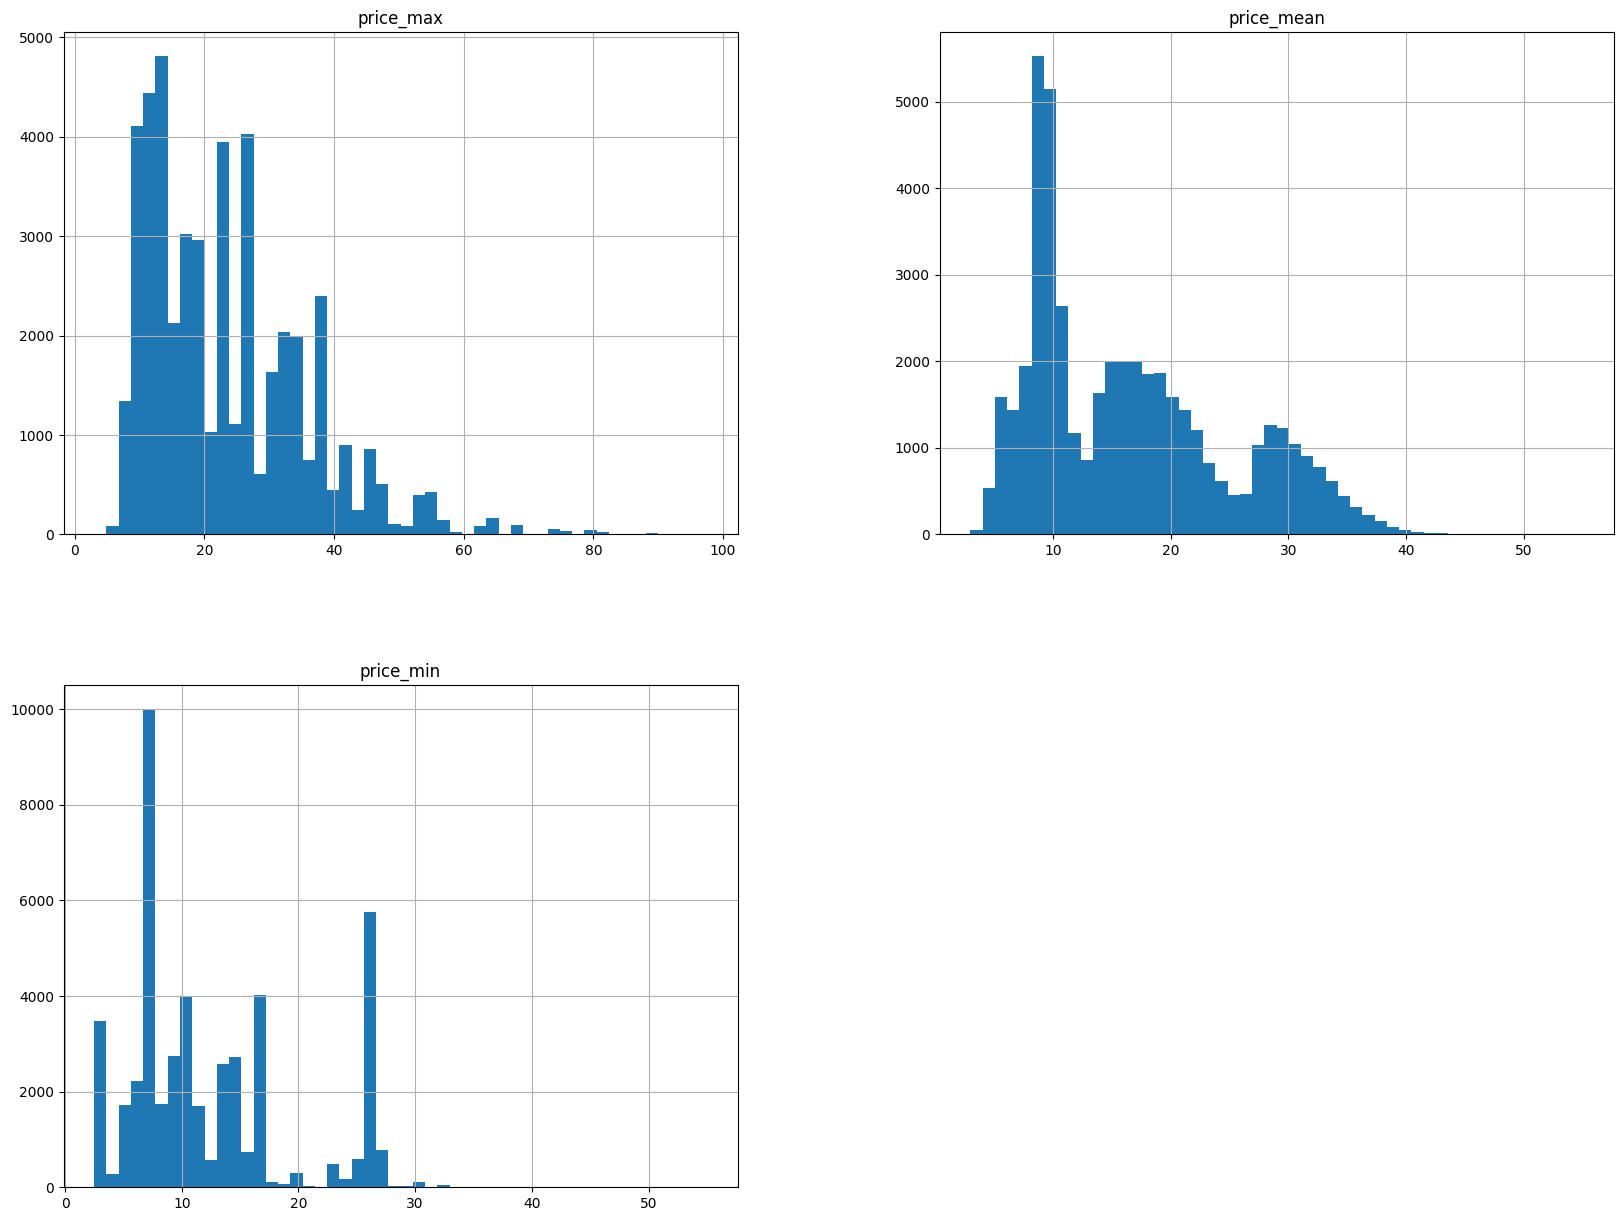

In [36]:
df.hist(bins=50, figsize=(20,15))
plt.show()

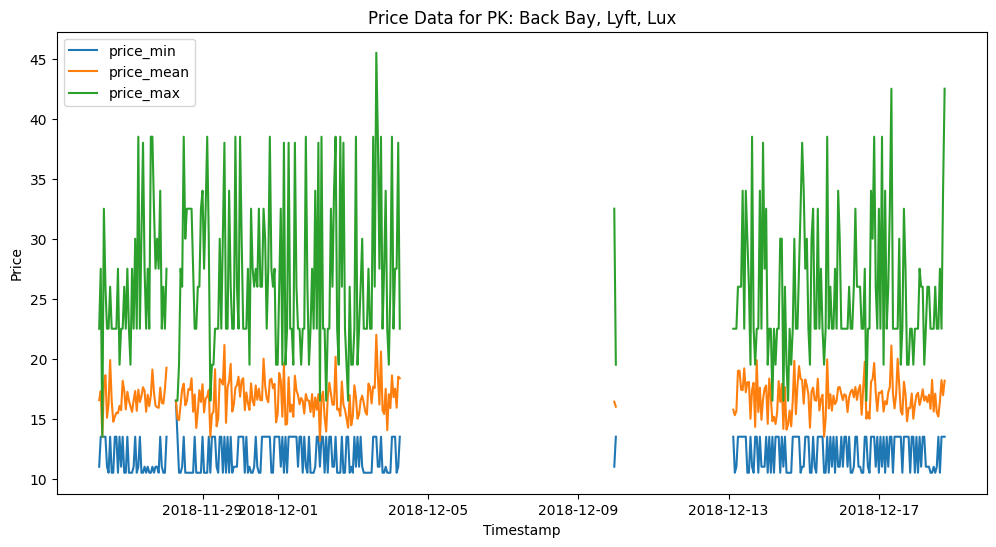

In [37]:
# Timestamp 칼럼을 datetime 형식으로 변환하고 정렬
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.sort_values('Timestamp', inplace=True)

# 고유 PK 조합 (Location, Provider, Service_Type) 중 첫 번째를 선택
unique_pk = df[['Location', 'Provider', 'Service_Type']].drop_duplicates().iloc[0]
selected_location = unique_pk['Location']
selected_provider = unique_pk['Provider']
selected_service_type = unique_pk['Service_Type']

# 해당 PK 조합의 데이터 필터링
filtered_df = df[(df['Location'] == selected_location) &
                 (df['Provider'] == selected_provider) &
                 (df['Service_Type'] == selected_service_type)]

# 시각화: Timestamp를 x축으로, price_min, price_mean, price_max를 플롯
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Timestamp'], filtered_df['price_min'], linestyle='-', label='price_min')
plt.plot(filtered_df['Timestamp'], filtered_df['price_mean'], linestyle='-', label='price_mean')
plt.plot(filtered_df['Timestamp'], filtered_df['price_max'], linestyle='-', label='price_max')
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title(f"Price Data for PK: {selected_location}, {selected_provider}, {selected_service_type}")
plt.legend()
plt.show()


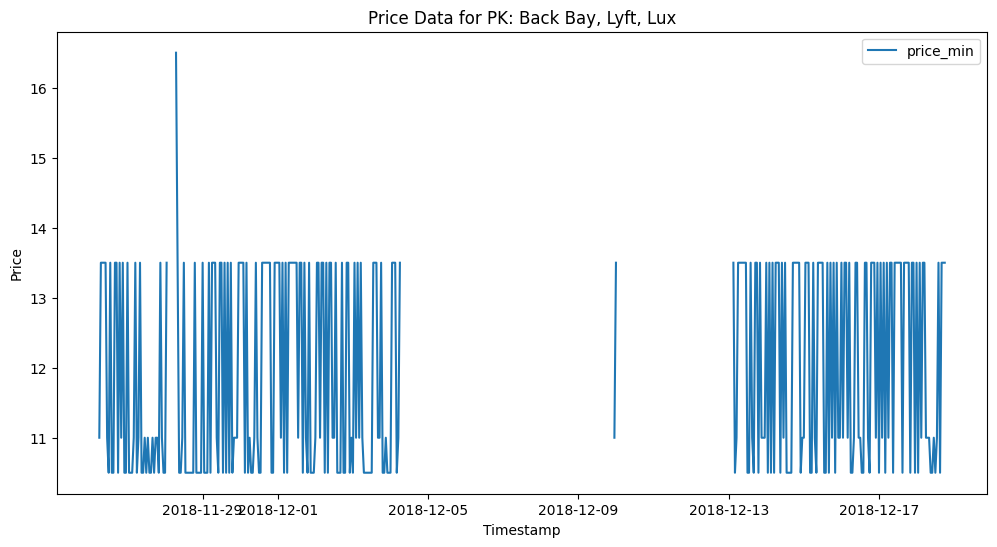

In [38]:
# Timestamp 칼럼을 datetime 형식으로 변환하고 정렬
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.sort_values('Timestamp', inplace=True)

# 고유 PK 조합 (Location, Provider, Service_Type) 중 첫 번째를 선택
unique_pk = df[['Location', 'Provider', 'Service_Type']].drop_duplicates().iloc[0]
selected_location = unique_pk['Location']
selected_provider = unique_pk['Provider']
selected_service_type = unique_pk['Service_Type']

# 해당 PK 조합의 데이터 필터링
filtered_df = df[(df['Location'] == selected_location) &
                 (df['Provider'] == selected_provider) &
                 (df['Service_Type'] == selected_service_type)]

# 시각화: Timestamp를 x축으로, price_min, price_mean, price_max를 플롯
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Timestamp'], filtered_df['price_min'], linestyle='-', label='price_min')
# plt.plot(filtered_df['Timestamp'], filtered_df['price_mean'], linestyle='-', label='price_mean')
# plt.plot(filtered_df['Timestamp'], filtered_df['price_max'], linestyle='-', label='price_max')
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title(f"Price Data for PK: {selected_location}, {selected_provider}, {selected_service_type}")
plt.legend()
plt.show()


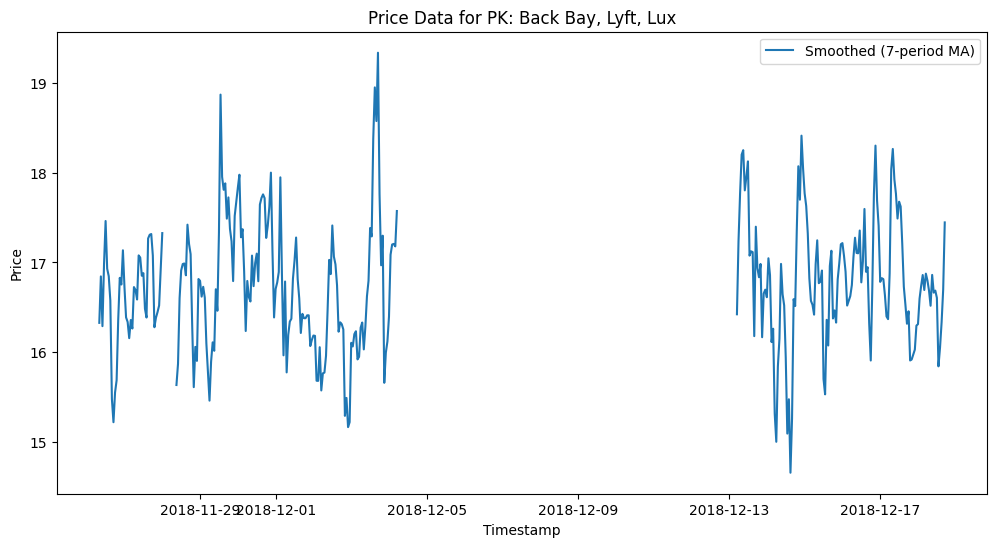

In [39]:
# Timestamp 칼럼을 datetime 형식으로 변환하고 정렬
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.sort_values('Timestamp', inplace=True)

# 고유 PK 조합 (Location, Provider, Service_Type) 중 첫 번째 조합 선택
unique_pk = df[['Location', 'Provider', 'Service_Type']].drop_duplicates().iloc[0]
selected_location = unique_pk['Location']
selected_provider = unique_pk['Provider']
selected_service_type = unique_pk['Service_Type']

# 해당 PK 조합의 데이터 필터링
filtered_df = df[(df['Location'] == selected_location) &
                 (df['Provider'] == selected_provider) &
                 (df['Service_Type'] == selected_service_type)]

# 원본 데이터를 복사 후, 이동평균을 이용해 'price_min' 칼럼 smoothing (7기간)
filtered_df = filtered_df.copy()
filtered_df['price_min_smoothed'] = filtered_df['price_mean'].rolling(window=4, center=True).mean()

# 시각화: 원본과 smoothing된 price_min 플롯
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Timestamp'], filtered_df['price_min_smoothed'], linestyle='-',
         label='Smoothed (7-period MA)')
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title(f"Price Data for PK: {selected_location}, {selected_provider}, {selected_service_type}")
plt.legend()
plt.show()


In [41]:
# df: pk와 price 관련 컬럼만 포함한 DataFrame
# price 관련 컬럼 이름을 필요에 따라 수정하세요.
price_cols = ['price_min', 'price_mean', 'price_max']

# pk 그룹별로 최소 하나의 유효한 값이 있는 그룹만 남김
df_clean = df.groupby(['Location', 'Provider', 'Service_Type']).filter(
    lambda group: group[price_cols].notna().sum().sum() > 0
)

print("결측치만 있는 pk가 제거된 후 데이터 shape:", df_clean.shape)

# 원래의 pk 개수 확인
original_pk_count = df[['Location', 'Provider', 'Service_Type']].drop_duplicates().shape[0]
print("원래의 PK 개수:", original_pk_count)

# df_clean은 이미 결측치만 있는 pk를 제거한 DataFrame입니다.
cleaned_pk_count = df_clean[['Location', 'Provider', 'Service_Type']].drop_duplicates().shape[0]
print("결측치 제거 후의 PK 개수:", cleaned_pk_count)
df = df_clean

결측치만 있는 pk가 제거된 후 데이터 shape: (77904, 7)
원래의 PK 개수: 144
결측치 제거 후의 PK 개수: 144


In [43]:
# df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# df.set_index('Timestamp', inplace=True)
# df.sort_index(inplace=True)

In [45]:
# 각 Timestamp에 대해 모든 PK의 "price_mean"이 결측인지 확인
# (Timestamp에 해당하는 모든 행에서 price_mean이 NaN이면 True, 아니면 False)
common_missing = df.groupby(df.index)['price_mean'].apply(lambda x: x.isna().all())

# 이제 common_missing은 unique한 Timestamp 인덱스를 가진 Series입니다.
# True인 Timestamp들이 모든 PK에서 결측인 시간입니다.
mask = common_missing  # boolean Series: True if all PK missing at that timestamp

# 연속된 구간을 구분하기 위해 그룹 번호를 생성합니다.
group_id = (mask != mask.shift()).cumsum()

# 결측값(True)인 경우만 필터링한 후, 그룹별로 묶습니다.
missing_groups = common_missing[mask].groupby(group_id)

# 각 그룹별로 시작시간, 종료시간, 결측 데이터 개수를 출력합니다.
for _, group in missing_groups:
    if group.empty:
        continue
    start_time = group.index[0]
    end_time = group.index[-1]
    count = len(group)
    print(f"{start_time} ~ {end_time}, {count}개 데이터 결측")


2018-11-28 02:00:00+00:00 ~ 2018-11-28 06:00:00+00:00, 5개 데이터 결측
2018-12-04 07:00:00+00:00 ~ 2018-12-09 22:00:00+00:00, 136개 데이터 결측
2018-12-10 03:00:00+00:00 ~ 2018-12-13 02:00:00+00:00, 72개 데이터 결측


2018-11-27 21:00:00+00:00 ~ 2018-11-28 10:00:00+00:00, 14개 데이터 결측 (merged)
2018-12-04 02:00:00+00:00 ~ 2018-12-13 06:00:00+00:00, 221개 데이터 결측 (merged)
